In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [37]:
len(X_test)
X_test=X_test/255
X_train=X_train/255

In [71]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [72]:
X_train.shape

(60000, 28, 28)

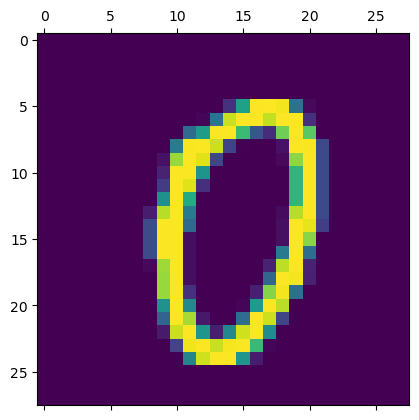

In [73]:
plt.matshow(X_train[1000])

In [74]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
# Y_train_flatten=Y_train.reshape(len(Y_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
# Y_test_flatten=Y_test.reshape(len(Y_test),28*28)

In [75]:
X_train_flattened.shape

(60000, 784)

In [76]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4677 - accuracy: 0.8790
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2663 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2553 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2534 - accuracy: 0.9293
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.251

In [77]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2654 - accuracy: 0.9267


[0.2654372453689575, 0.9266999959945679]

In [86]:
y_pre=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


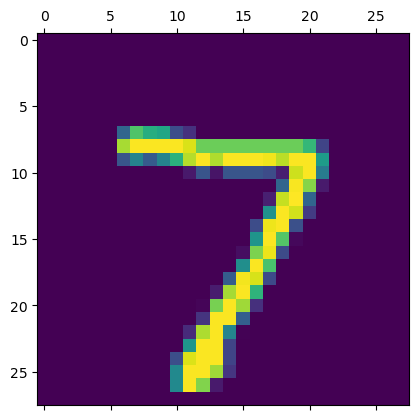

In [85]:
#It consists the number 7
plt.matshow(X_test[0])

In [90]:
#And predict one also the 7 
np.argmax(y_pre[0])

7

In [92]:
y_predicted_th=[np.argmax(i) for i in y_pre]
y_predicted_th[:5]

[7, 2, 1, 0, 4]

In [99]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_th)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    5,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,   11,  918,   17,    7,    3,   12,   13,   40,    5],
       [   3,    0,   15,  922,    0,   22,    2,   12,   26,    8],
       [   1,    2,    4,    2,  911,    0,   10,    5,    9,   38],
       [   9,    2,    1,   36,    8,  770,   13,   10,   36,    7],
       [  12,    3,    9,    1,    7,   12,  909,    2,    3,    0],
       [   1,    6,   21,    4,    4,    0,    0,  963,    3,   26],
       [   7,    9,    6,   17,    9,   20,    7,   13,  877,    9],
       [  10,    7,    1,    9,   22,    4,    0,   30,    7,  919]])>

Text(95.72222222222221, 0.5, 'Truth')

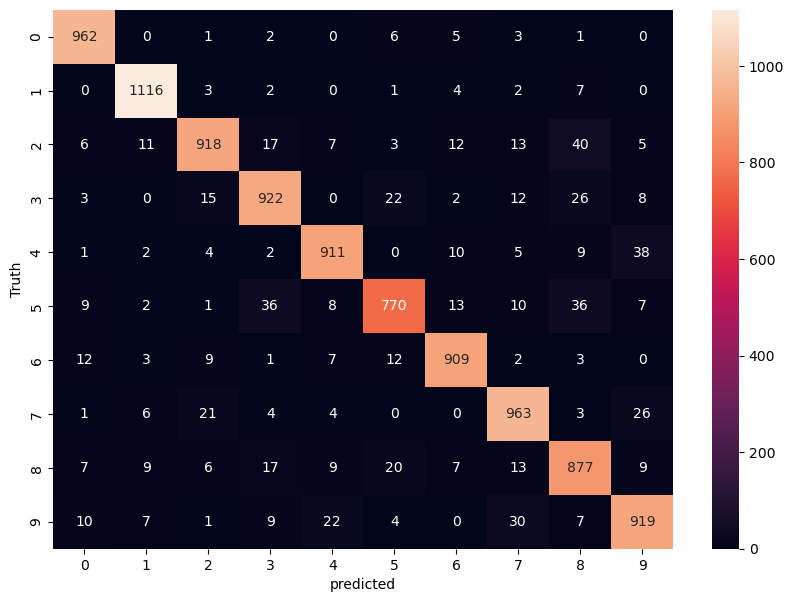

In [102]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [106]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2846 - accuracy: 0.9184
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1303 - accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0909 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0698 - accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0552 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0256 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

In [110]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9777


[0.07585132867097855, 0.9776999950408936]

Text(95.72222222222221, 0.5, 'Truth')

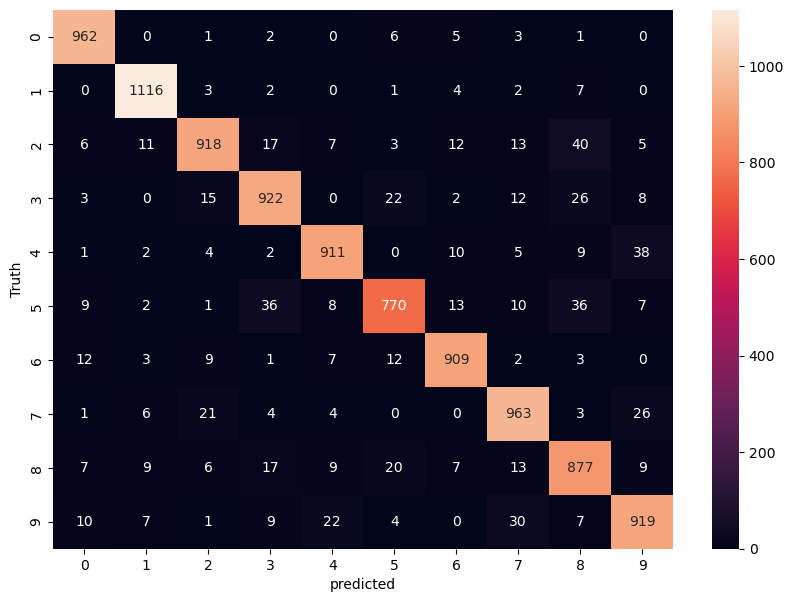

In [112]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [115]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2754 - accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1216 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0521 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01